In [1]:
#import librari

import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from fbprophet import Prophet
import datetime

In [2]:
#menggabungkan data
import pandas as pd
data1 = pd.read_csv('testing.csv')
data2 = pd.read_csv('training.csv')

#gabungkan data
frames = [data1,data2]
results = pd.concat(frames).drop_duplicates().reset_index(drop=True)

#ekspor data
results.to_csv(r'data_user.csv',index=False)

In [3]:
#memanggil dataset
df = pd.read_csv('data_user.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


In [4]:
df.isna().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5    UNS    403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [6]:
#cleaningdata

df= df.drop(["SCG"],axis=1)
df

,STG,STR,LPR,PEG,UNS
0,0.00,0.50,0.26,0.05,Very Low
1,0.05,0.55,0.60,0.14,Low
2,0.08,0.63,0.60,0.85,High
3,0.20,0.68,0.67,0.85,High
4,0.22,0.90,0.30,0.90,High
...,...,...,...,...,...
398,0.61,0.69,0.92,0.58,High
399,0.78,0.71,0.19,0.60,Middle
400,0.54,0.71,0.29,0.77,High
401,0.50,0.81,0.61,0.26,Middle


In [7]:
#normalisasi

df_groupby_STG=df.groupby("STG")
df_groupby_STG["STG"].count()

STG
0.00    5
0.02    1
0.04    1
0.05    3
0.06    6
       ..
0.88    1
0.89    1
0.90    3
0.91    1
0.99    1
Name: STG, Length: 112, dtype: int64

In [8]:
df_x=df.groupby('STG')
df_x.agg('max')

,STR,LPR,PEG,UNS
STG,,,,
0.00,0.52,0.26,0.85,very_low
0.02,0.36,0.76,0.10,Low
0.04,0.55,0.25,0.10,very_low
0.05,0.70,0.60,0.32,very_low
0.06,0.72,0.76,0.56,Middle
...,...,...,...,...
0.88,0.19,0.55,0.78,High
0.89,0.49,0.65,0.90,High
0.90,0.62,0.58,0.97,High


In [9]:
df_x1=df.groupby('STR')
df_x1.agg('min')

,STG,LPR,PEG,UNS
STR,,,,
0.00,0.000,0.00,0.00,very_low
0.01,0.160,0.10,0.07,Very Low
0.02,0.090,0.00,0.11,High
0.03,0.250,0.09,0.15,very_low
0.04,0.180,0.19,0.82,High
...,...,...,...,...
0.88,0.200,0.09,0.30,High
0.89,0.300,0.12,0.66,High
0.90,0.210,0.22,0.90,High


In [10]:
df_x=df.groupby('LPR')
df_x.agg('mean')

,STG,STR,PEG
LPR,,,
0.000,0.0500,0.010,0.125
0.001,0.2500,0.300,0.250
0.010,0.2725,0.685,0.490
0.020,0.3000,0.400,0.670
0.030,0.4200,0.140,0.680
...,...,...,...
0.950,0.4600,0.760,0.650
0.960,0.6100,0.245,0.615
0.970,0.6800,0.790,0.240


In [11]:
#dataselection
df.sort_values(by=["STG","PEG"])

,STG,STR,LPR,PEG,UNS
145,0.00,0.00,0.00,0.00,very_low
0,0.00,0.50,0.26,0.05,Very Low
17,0.00,0.50,0.09,0.07,Very Low
51,0.00,0.52,0.26,0.07,Very Low
154,0.00,0.50,0.20,0.85,High
...,...,...,...,...,...
357,0.90,0.19,0.58,0.79,High
140,0.90,0.62,0.32,0.89,High
125,0.90,0.24,0.30,0.97,High
390,0.91,0.26,0.89,0.88,High


<AxesSubplot:>

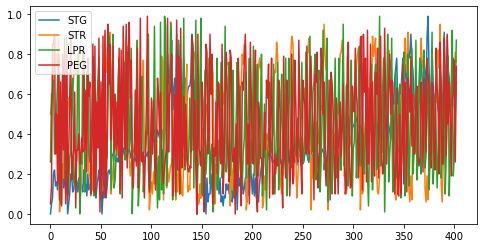

In [12]:
#VISUALISASI
df.plot(kind='line', figsize=(8,4))


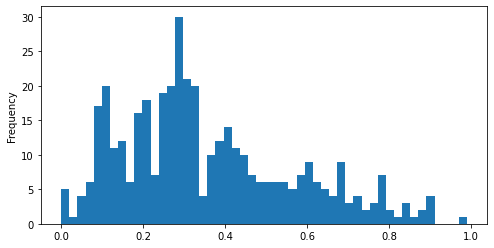

In [13]:
import matplotlib.pyplot as plt

df['STG'].plot(kind='hist',figsize=(8,4),bins=50)
plt.show()

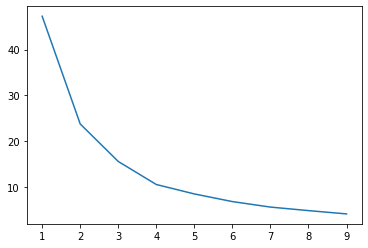

In [14]:
#import data
dataset = pd.read_csv('data_user.csv')
X = dataset.iloc[:, [1,4]].values

from sklearn.cluster import KMeans
wcss=[]
for i in range (1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.show()

In [62]:
#clustering
df2 = df[['STG','PEG']]
df2

,STG,PEG
0,0.00,0.05
1,0.05,0.14
2,0.08,0.85
3,0.20,0.85
4,0.22,0.90
...,...,...
398,0.61,0.58
399,0.78,0.60
400,0.54,0.77
401,0.50,0.26


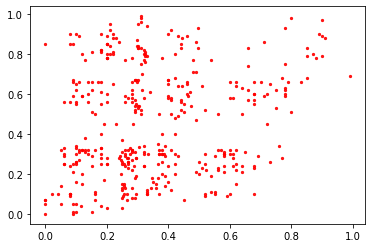

In [63]:
#melihat persebaran data
import matplotlib.pyplot as plt
plt.scatter(df2.STG, df2.PEG, s=5, c="red",marker="o", alpha=0.9)
plt.show()

In [64]:
#melihat deskripsi data
df2['PEG'].describe()

count    403.000000
mean       0.456360
std        0.266775
min        0.000000
25%        0.250000
50%        0.400000
75%        0.660000
max        0.990000
Name: PEG, dtype: float64

In [65]:
df2['STG'].describe()

count    403.000000
mean       0.353141
std        0.212018
min        0.000000
25%        0.200000
50%        0.300000
75%        0.480000
max        0.990000
Name: STG, dtype: float64

In [66]:
#merubah data menjadi array
import numpy as np
df2_array=np.array(df2)
print(df2_array)

[[0.    0.05 ]
 [0.05  0.14 ]
 [0.08  0.85 ]
 [0.2   0.85 ]
 [0.22  0.9  ]
 [0.14  0.3  ]
 [0.16  0.5  ]
 [0.12  0.15 ]
 [0.2   0.8  ]
 [0.16  0.07 ]
 [0.11  0.66 ]
 [0.18  0.04 ]
 [0.21  0.8  ]
 [0.13  0.32 ]
 [0.23  0.88 ]
 [0.1   0.05 ]
 [0.22  0.8  ]
 [0.    0.07 ]
 [0.05  0.32 ]
 [0.1   0.55 ]
 [0.2   0.89 ]
 [0.19  0.17 ]
 [0.11  0.27 ]
 [0.12  0.32 ]
 [0.18  0.61 ]
 [0.2   0.03 ]
 [0.16  0.32 ]
 [0.11  0.32 ]
 [0.18  0.4  ]
 [0.1   0.25 ]
 [0.18  0.3  ]
 [0.13  0.38 ]
 [0.11  0.31 ]
 [0.22  0.81 ]
 [0.14  0.32 ]
 [0.15  0.62 ]
 [0.09  0.21 ]
 [0.2   0.78 ]
 [0.12  0.59 ]
 [0.14  0.66 ]
 [0.16  0.1  ]
 [0.12  0.32 ]
 [0.2   0.85 ]
 [0.16  0.11 ]
 [0.21  0.84 ]
 [0.08  0.1  ]
 [0.14  0.56 ]
 [0.18  0.33 ]
 [0.22  0.88 ]
 [0.1   0.01 ]
 [0.15  0.66 ]
 [0.    0.07 ]
 [0.11  0.89 ]
 [0.08  0.1  ]
 [0.21  0.92 ]
 [0.08  0.09 ]
 [0.13  0.31 ]
 [0.21  0.95 ]
 [0.22  0.65 ]
 [0.2   0.85 ]
 [0.25  0.37 ]
 [0.29  0.52 ]
 [0.3   0.84 ]
 [0.32  0.31 ]
 [0.28  0.6  ]
 [0.26  0.32 ]
 [0.28  0.

In [67]:
#menstandarkan ukuran variabel
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
minmax=preprocessing.MinMaxScaler().fit_transform(df2)
minmax

array([[0.        , 0.05050505],
       [0.05050505, 0.14141414],
       [0.08080808, 0.85858586],
       [0.2020202 , 0.85858586],
       [0.22222222, 0.90909091],
       [0.14141414, 0.3030303 ],
       [0.16161616, 0.50505051],
       [0.12121212, 0.15151515],
       [0.2020202 , 0.80808081],
       [0.16161616, 0.07070707],
       [0.11111111, 0.66666667],
       [0.18181818, 0.04040404],
       [0.21212121, 0.80808081],
       [0.13131313, 0.32323232],
       [0.23232323, 0.88888889],
       [0.1010101 , 0.05050505],
       [0.22222222, 0.80808081],
       [0.        , 0.07070707],
       [0.05050505, 0.32323232],
       [0.1010101 , 0.55555556],
       [0.2020202 , 0.8989899 ],
       [0.19191919, 0.17171717],
       [0.11111111, 0.27272727],
       [0.12121212, 0.32323232],
       [0.18181818, 0.61616162],
       [0.2020202 , 0.03030303],
       [0.16161616, 0.32323232],
       [0.11111111, 0.32323232],
       [0.18181818, 0.4040404 ],
       [0.1010101 , 0.25252525],
       [0.

In [68]:
#mencari nilai minmax
df3=pd.DataFrame(minmax, index=df2.index, columns=df2.columns)
df3

,STG,PEG
0,0.000000,0.050505
1,0.050505,0.141414
2,0.080808,0.858586
3,0.202020,0.858586
4,0.222222,0.909091
...,...,...
398,0.616162,0.585859
399,0.787879,0.606061
400,0.545455,0.777778
401,0.505051,0.262626


In [69]:
#menebak data cluster
#menghitung score
KMeans(n_clusters=2).fit(df3).score(df3)

#menghitung dati 1-10
scr=[]
for i in range (1,10):
    score= KMeans(n_clusters=i).fit(df3).score(df3)
    print(score)
    scr.append(score)

-47.62828667151248
-23.520000605766256
-15.489243640906647
-10.727174758283322
-8.293270900519676
-6.863450505668977
-5.731470112173211
-4.911004372395351
-4.182831908490418


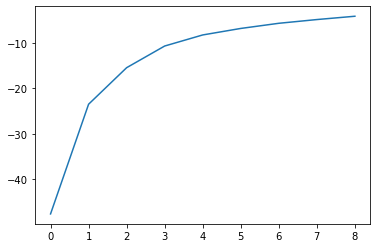

In [70]:
plt.plot(scr)

In [71]:
#dari grafik di atas mengambil clusteryang evisien 1-2
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3)

KMeans(n_clusters=5)

In [72]:
kmeans.labels_

array([3, 3, 2, 2, 2, 3, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 3, 4, 2, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 2, 4, 4, 3, 3, 2, 3,
       2, 3, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3, 3, 2, 4, 2, 3, 4, 2, 3, 4, 3,
       4, 3, 2, 3, 2, 3, 2, 4, 3, 2, 3, 2, 2, 4, 2, 3, 3, 3, 4, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 4, 2, 3, 3, 0, 4, 0, 4, 0, 0, 0, 4, 4, 0, 4,
       0, 0, 3, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 3, 2, 3, 3, 3, 4, 4, 3, 3,
       2, 2, 3, 3, 2, 4, 2, 3, 3, 3, 4, 3, 4, 4, 3, 3, 2, 3, 3, 4, 2, 4,
       3, 3, 2, 2, 3, 3, 3, 3, 4, 3, 2, 4, 3, 3, 4, 4, 2, 2, 4, 3, 4, 3,
       2, 4, 3, 3, 4, 2, 3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 4, 2,
       3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3,
       2, 4, 3, 3, 2, 4, 3, 3, 4, 4, 4, 3, 2, 3, 3, 4, 2, 4, 4, 3, 4, 4,
       2, 3, 3, 3, 2, 2, 4, 4, 3, 3, 3, 0, 4, 0, 4, 4, 4, 0, 3, 4, 0, 3,
       0, 4, 0, 4, 4, 0, 3, 3, 2, 2, 3, 3, 0, 4, 4,

In [73]:
#memasukkan tabel ke kluster
df3['cluster']=kmeans.labels_
df3

,STG,PEG,cluster
0,0.000000,0.050505,3
1,0.050505,0.141414,3
2,0.080808,0.858586,2
3,0.202020,0.858586,2
4,0.222222,0.909091,2
...,...,...,...
398,0.616162,0.585859,1
399,0.787879,0.606061,1
400,0.545455,0.777778,1
401,0.505051,0.262626,0


(array([ 74.,   0.,  47.,   0.,   0.,  66.,   0., 131.,   0.,  85.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

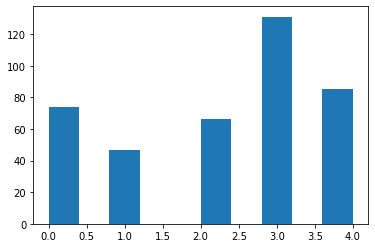

In [74]:
plt.hist(df3['cluster'])

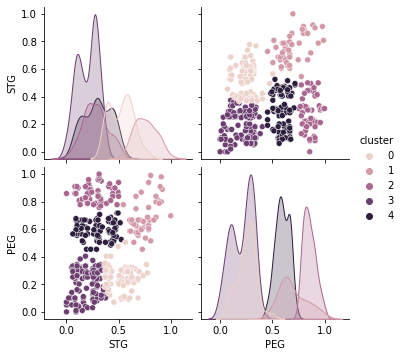

In [75]:
import seaborn as sns
sns.pairplot(df3,hue='cluster')

In [85]:
#FORCASTING

import pandas as pd
df = pd.read_csv('result.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS,Date
0,0.00,0.10,0.50,0.26,0.05,Very Low,11/26/2019
1,0.05,0.05,0.55,0.60,0.14,Low,11/27/2019
2,0.08,0.18,0.63,0.60,0.85,High,11/28/2019
3,0.20,0.20,0.68,0.67,0.85,High,11/29/2019
4,0.22,0.22,0.90,0.30,0.90,High,11/30/2019


In [77]:
df3 = df[['Date','STG']]
df3.head()

,Date,STG
0,11/26/2019,0.00
1,11/27/2019,0.05
2,11/28/2019,0.08
3,11/29/2019,0.20
4,11/30/2019,0.22


In [78]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    403 non-null    object 
 1   STG     403 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.4+ KB


In [87]:
import datetime
from datetime import datetime
con=df3['Date']
df3['Date']=pd.to_datetime(df3['Date'])
df3.set_index('Date',inplace=True)
df3.index

DatetimeIndex(['2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
               '2019-11-30', '2019-12-01', '2019-12-02', '2019-12-03',
               '2019-12-04', '2019-12-05',
               ...
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', name='Date', length=403, freq=None)

In [88]:
#konversi ke deret waktu
ts =df3['STG']
ts.head()

Date
2019-11-26    0.00
2019-11-27    0.05
2019-11-28    0.08
2019-11-29    0.20
2019-11-30    0.22
Name: STG, dtype: float64

In [89]:
#spesifik kotak masuk sebagai kontanta string
ts['2019-11-26']

0.0

In [90]:
#import datetime dan jalankan fungsi datetime
from datetime import datetime
ts[datetime(2019,11,26)]

0.0

In [99]:
#tentukan seluruh rentang
ts['2019-11-26':'2022-01-01']

Date
2019-11-26    0.00
2019-11-27    0.05
2019-11-28    0.08
2019-11-29    0.20
2019-11-30    0.22
              ... 
2020-12-28    0.61
2020-12-29    0.78
2020-12-30    0.54
2020-12-31    0.50
2021-01-01    0.66
Name: STG, Length: 403, dtype: float64

In [100]:
#gunakan ':' salah satu index berakhir
ts[:'2022-01-01']

Date
2019-11-26    0.00
2019-11-27    0.05
2019-11-28    0.08
2019-11-29    0.20
2019-11-30    0.22
              ... 
2020-12-28    0.61
2020-12-29    0.78
2020-12-30    0.54
2020-12-31    0.50
2021-01-01    0.66
Name: STG, Length: 403, dtype: float64

In [101]:
#semua baris dari 2021
ts['2021']

Date
2021-01-01    0.66
Name: STG, dtype: float64

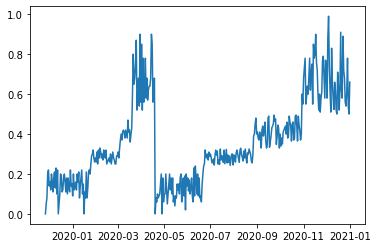

In [102]:
#memahami stationar dengan memperhatikan plot
plt.plot(ts)

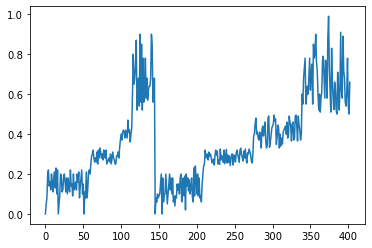

In [103]:
#melihat berdasarkan tren
ts_log= np.array(ts)
plt.plot(ts_log)

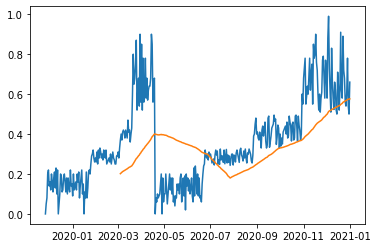

In [104]:
#melihat data rata-rata per 100 hari
forcast =df3['STG']
mavg= forcast.rolling(window=100).mean()
plt.plot(forcast)
plt.plot(mavg)

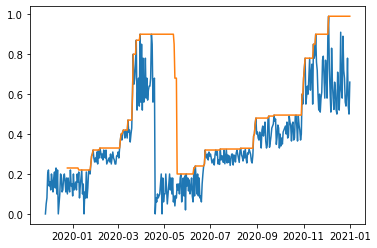

In [105]:
#melihat data maksimal per 30 hari
forcast =df3['STG']
mavg= forcast.rolling(window=30).max()
plt.plot(forcast)
plt.plot(mavg)

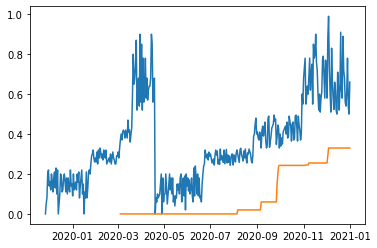

In [106]:
#melihat data min per 100 hari
forcast =df3['STG']
mavg= forcast.rolling(window=100).min()
plt.plot(forcast)
plt.plot(mavg)

In [111]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

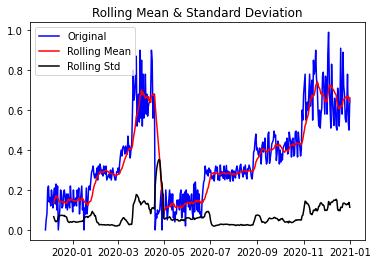

Results of Dickey-Fuller Test:
Test Statistic                  -2.113749
p-value                          0.239022
#Lags Used                      17.000000
Number of Observations Used    385.000000
Critical Value (1%)             -3.447450
Critical Value (5%)             -2.869077
Critical Value (10%)            -2.570785
dtype: float64


In [112]:
test_stationarity(ts)

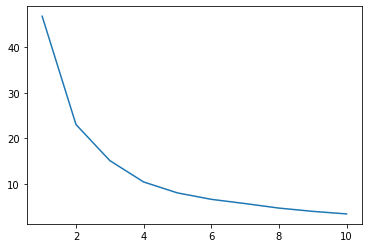

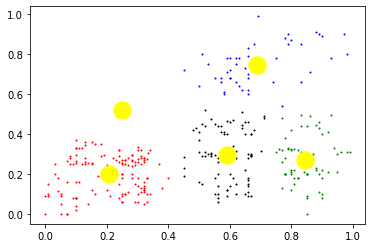

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

onset = pd.read_csv("result.csv")
X = onset[['PEG', 'STG']].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.show()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1] , s = 1, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1] , s = 1, c = 'green')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1] , s = 1, c = 'blue')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1] , s = 1, c = 'black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow')
plt.show()